Data Wrangling and Data Story in Python for the Capstone Project 1 
Data Set - Mental Health in Tech Survey
Name - Nilay Desai

In [1]:
#import the modules 
import csv
import pandas as pd
import numpy as np
from random import randint
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from array import *
from scipy import stats
from scipy.stats import randint

In [2]:
#create a dataframe to store the data in
#let the system know a column is a date in the read_csv function
df = pd.read_csv('Data/survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [5]:
#convert datetime to datetime64 type
#look into converting to 
df['Timestamp'] = df['Timestamp'].astype('datetime64[ns]')
type(df['Gender'])

pandas.core.series.Series

In [6]:
_ = df['Timestamp']

In [7]:
#figure out the distribution first and then determine the mode or random
df.Gender.replace({'Female': 1, 'female': 1, 'f': 1, 'F': 1, 'Male': 0, 'male': 0, 'm': 0, 'M': 0, r'[a-z]+':1}, regex=True, inplace=True)

In [8]:
#create a dictionary to see the kind of values in Country columumns
Countries = {}
for country in df['Country']:
    if country in Countries:
        Countries[country] += 1
    else:
        Countries[country] = 1

In [9]:
#Countries
#regions

In [10]:
#create a dictionary to see the kind of values in leaves columumns
leave_difficulty = {}
for leave in df['leave']:
    if leave in leave_difficulty:
        leave_difficulty[leave] += 1
    else:
        leave_difficulty[leave] = 1

In [11]:
leave_difficulty

{"Don't know": 563,
 'Somewhat difficult': 126,
 'Somewhat easy': 266,
 'Very difficult': 98,
 'Very easy': 206}

In [12]:
#convert the list into categorical data
for leave in df['leave']:
    if leave[0] == 'D':
        leave = 5
    elif leave == 'Somewhat difficult':
        leave = 2
    elif leave == 'Somewhat easy':
        leave = 1
    elif leave == 'Very difficult':
        leave = 3
    elif leave == 'Very easy':
        leave = 0

In [13]:
#df.leave.head()
#change the order 

In [14]:
df.leave.replace({'Somewhat difficult': 2, 'Somewhat easy': 1, 'Very difficult': 3, 'Very easy': 0, 'Don\'t know': 4}, inplace=True)

In [15]:
#df.leave
#sklearn.preprocessing label encoding

In [16]:
#create a dictionary to see the kind of values in number of employees columumns
no_employees = {}
for num in df['no_employees']:
    if num in no_employees:
        no_employees[num] += 1
    else:
        no_employees[num] = 1

In [17]:
no_employees
#keep the order ascending

{'1-5': 162,
 '100-500': 176,
 '26-100': 289,
 '500-1000': 60,
 '6-25': 290,
 'More than 1000': 282}

In [18]:
df.no_employees.replace({'1-5': 0, '100-500': 3, '26-100': 2, '500-1000': 4, '6-25': 1, 'More than 1000': 5}, inplace=True)

In [19]:
#df.seek_help
#classify 3 things - no missing in target variables 
#multi class classification 

In [20]:
#countries can be used but states are tough HIGH CARDINALITY
#turn them into numbers (label encoding) 
#

In [21]:
#create a dictionary to see the kind of values in family history columumns
family_history = {}
for history in df['family_history']:
    if history in family_history:
        family_history[history] += 1
    else:
        family_history[history] = 1

In [22]:
family_history

{'No': 767, 'Yes': 492}

In [23]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

In [24]:
df[['family_history', 'treatment']].shape

(1259, 2)

In [25]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns without N/A
df[['family_history', 'treatment', 'remote_work', 'tech_company']] = df[['family_history', 'treatment', 'remote_work', 'tech_company']].apply(le.fit_transform)

In [26]:
#deleting the column comments
df = df.drop(columns='comments')

In [27]:
#df.head()

In [28]:
#create a dictionary to see the kind of values in self_employed columumns
self_employed = {}
for option in df['self_employed']:
    if option in self_employed:
        self_employed[option] += 1
    else:
        self_employed[option] = 1

In [29]:
self_employed

{'No': 1095, 'Yes': 146, nan: 18}

In [30]:
#create a dictionary to see the kind of values in work_interfere columumns
work_interfere = {}
for work in df['work_interfere']:
    if work in work_interfere:
        work_interfere[work] += 1
    else:
        work_interfere[work] = 1

In [31]:
work_interfere
#look into this whether its missing or just another category

{'Never': 213, 'Often': 144, 'Rarely': 173, 'Sometimes': 465, nan: 264}

In [32]:
#create a dictionary to see the kind of values in benefits columumns
benefits = {}
for benefit in df['benefits']:
    if benefit in benefits:
        benefits[benefit] += 1
    else:
        benefits[benefit] = 1

In [33]:
benefits

{"Don't know": 408, 'No': 374, 'Yes': 477}

In [34]:
#create a dictionary to see the kind of values in care_options columumns
care_options = {}
for care in df['care_options']:
    if care in care_options:
        care_options[care] += 1
    else:
        care_options[care] = 1

In [35]:
care_options

{'No': 501, 'Not sure': 314, 'Yes': 444}

In [36]:
#create a dictionary to see the kind of values in wellness_program columumns
wellness_program = {}
for program in df['wellness_program']:
    if program in wellness_program:
        wellness_program[program] += 1
    else:
        wellness_program[program] = 1

In [37]:
wellness_program

{"Don't know": 188, 'No': 842, 'Yes': 229}

In [38]:
#create a dictionary to see the kind of values in seek_help columumns
seek_help = {}
for options in df['seek_help']:
    if options in seek_help:
        seek_help[options] += 1
    else:
        seek_help[options] = 1

In [39]:
seek_help

{"Don't know": 363, 'No': 646, 'Yes': 250}

In [40]:
#create a dictionary to see the kind of values in anonymity columumns
anonymity = {}
for options in df['anonymity']:
    if options in anonymity:
        anonymity[options] += 1
    else:
        anonymity[options] = 1

In [41]:
anonymity

{"Don't know": 819, 'No': 65, 'Yes': 375}

In [42]:
#create a dictionary to see the kind of values in mental_health_consequence columumns
mental_health_consequence = {}
for options in df['mental_health_consequence']:
    if options in mental_health_consequence:
        mental_health_consequence[options] += 1
    else:
        mental_health_consequence[options] = 1

In [43]:
mental_health_consequence

{'Maybe': 477, 'No': 490, 'Yes': 292}

In [44]:
#create a dictionary to see the kind of values in phys_health_consequence columumns
phys_health_consequence = {}
for options in df['phys_health_consequence']:
    if options in phys_health_consequence:
        phys_health_consequence[options] += 1
    else:
        phys_health_consequence[options] = 1

In [45]:
phys_health_consequence

{'Maybe': 273, 'No': 925, 'Yes': 61}

In [46]:
#create a dictionary to see the kind of values in coworkers columumns
coworkers = {}
for options in df['coworkers']:
    if options in coworkers:
        coworkers[options] += 1
    else:
        coworkers[options] = 1

In [47]:
coworkers

{'No': 260, 'Some of them': 774, 'Yes': 225}

In [48]:
#create a dictionary to see the kind of values in supervisor columumns
supervisor = {}
for options in df['supervisor']:
    if options in supervisor:
        supervisor[options] += 1
    else:
        supervisor[options] = 1

In [49]:
supervisor

{'No': 393, 'Some of them': 350, 'Yes': 516}

In [50]:
#create a dictionary to see the kind of values in mental_health_interview columumns
mental_health_interview = {}
for options in df['mental_health_interview']:
    if options in mental_health_interview:
        mental_health_interview[options] += 1
    else:
        mental_health_interview[options] = 1

In [51]:
mental_health_interview

{'Maybe': 207, 'No': 1008, 'Yes': 44}

In [52]:
#create a dictionary to see the kind of values in phys_health_interview columumns
phys_health_interview = {}
for options in df['phys_health_interview']:
    if options in phys_health_interview:
        phys_health_interview[options] += 1
    else:
        phys_health_interview[options] = 1

In [53]:
phys_health_interview

{'Maybe': 557, 'No': 500, 'Yes': 202}

In [54]:
#create a dictionary to see the kind of values in mental_vs_physical columumns
mental_vs_physical = {}
for options in df['mental_vs_physical']:
    if options in mental_vs_physical:
        mental_vs_physical[options] += 1
    else:
        mental_vs_physical[options] = 1

In [55]:
mental_vs_physical

{"Don't know": 576, 'No': 340, 'Yes': 343}

In [56]:
#create a dictionary to see the kind of values in obs_consequences columumns
obs_consequence = {}
for options in df['obs_consequence']:
    if options in obs_consequence:
        obs_consequence[options] += 1
    else:
        obs_consequence[options] = 1

In [57]:
obs_consequence

{'No': 1075, 'Yes': 184}

In [58]:
# 2. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le_2 = preprocessing.LabelEncoder()

In [59]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns without N/A


In [60]:
df[['obs_consequence', 'mental_vs_physical']] = df[['obs_consequence', 'mental_vs_physical']].apply(le_2.fit_transform)

In [61]:
df[['phys_health_interview', 'mental_health_interview']] = df[['phys_health_interview', 'mental_health_interview']].apply(le_2.fit_transform)

In [62]:
df[['coworkers', 'supervisor', 'anonymity']] = df[['coworkers', 'supervisor', 'anonymity']].apply(le_2.fit_transform)

In [63]:
df[['phys_health_consequence', 'mental_health_consequence', 'seek_help', 'benefits', 'care_options', 'wellness_program']] = df[['phys_health_consequence', 'mental_health_consequence', 'seek_help', 'benefits', 'care_options', 'wellness_program']].apply(le_2.fit_transform)

In [64]:
#taking care of NANs for self employed. assuming "No" for all NAs
df['self_employed'].fillna(value='No', inplace=True)

In [65]:
df[['self_employed']] = df[['self_employed']].apply(le_2.fit_transform)

In [66]:
df['work_interfere'].fillna(value='Don\'t know', inplace=True)

In [67]:
df[['work_interfere']] = df[['work_interfere']].apply(le_2.fit_transform)

In [68]:
#deleting the state comments
df = df.drop(columns='state')

In [69]:
#df.head()

In [70]:
#df['Country'].value_counts().plot(kind='box')
#directly label encoding
#another approach top 10 and then 
#frequencies
#top 10 states 
#US canada Europe

In [71]:
c = {}
for options in df['obs_consequence']:
    if options in obs_consequence:
        obs_consequence[options] += 1
    else:
        obs_consequence[options] = 1

In [72]:
df[['Country']] = df[['Country']].apply(le_2.fit_transform)

In [73]:
#complete missing age 
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s

#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [74]:
#df.head()

In [75]:
#to print the unique values in a data series
#print(df['work_interfere'].unique())

In [76]:
df[['age_range']] = df[['age_range']].apply(le_2.fit_transform)

In [77]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Age                            0      0.0
Gender                         0      0.0
Country                        0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0  

In [78]:
#deleting the age comments
df = df.drop(columns='Timestamp')

In [79]:
#df.benefits.head()

In [80]:
#Questions 
#what is the distribution of age
#what is the distribution of gender
#what is the age and treatment distribution
#further separate it into gender
#what is the relationship between family history and treatment between genders
#what is the relationship between work interference and treatment
#what is the relationship between care_options and treatment


In [81]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

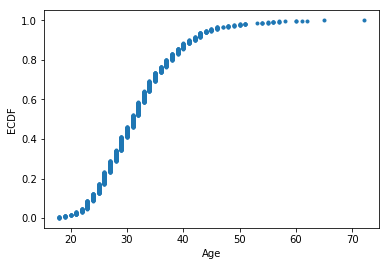

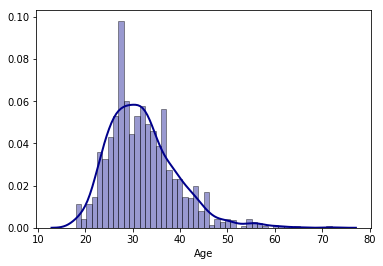

In [82]:
#distribution looks normal little right skewed, plotted the ecdf to confirm
x,y = ecdf(df['Age'])
_ = plt.plot(x, y, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

sns.distplot(df['Age'], hist=True, kde=True, color = 'darkblue', 
             bins=48, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

[Text(0,0,'male'), Text(0,0,'female')]

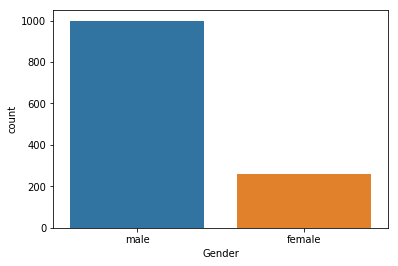

In [83]:
a = sns.countplot(x="Gender", data=df);
a.set_xticklabels(['male', 'female'])
#significantly higher number of males as expected in the tech industry

[Text(0,0,'yes'), Text(0,0,'no')]

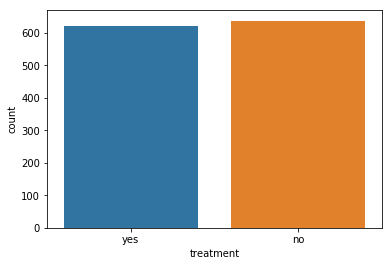

In [84]:
b = sns.countplot(x="treatment", data=df);
b.set_xticklabels(['yes', 'no'])

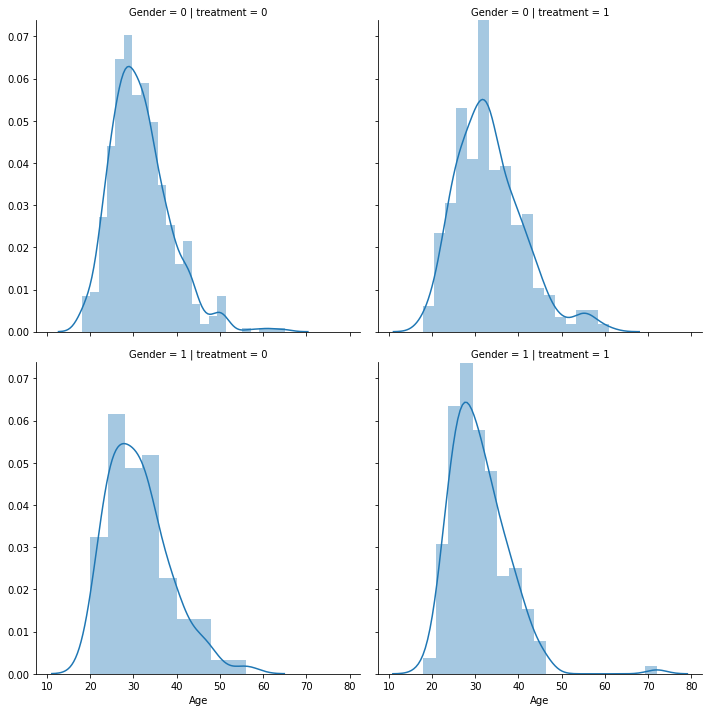

In [85]:
# Separate by treatment or not and by gender
g = sns.FacetGrid(df, col='treatment', row='Gender', size=5)
g = g.map(sns.distplot, "Age")

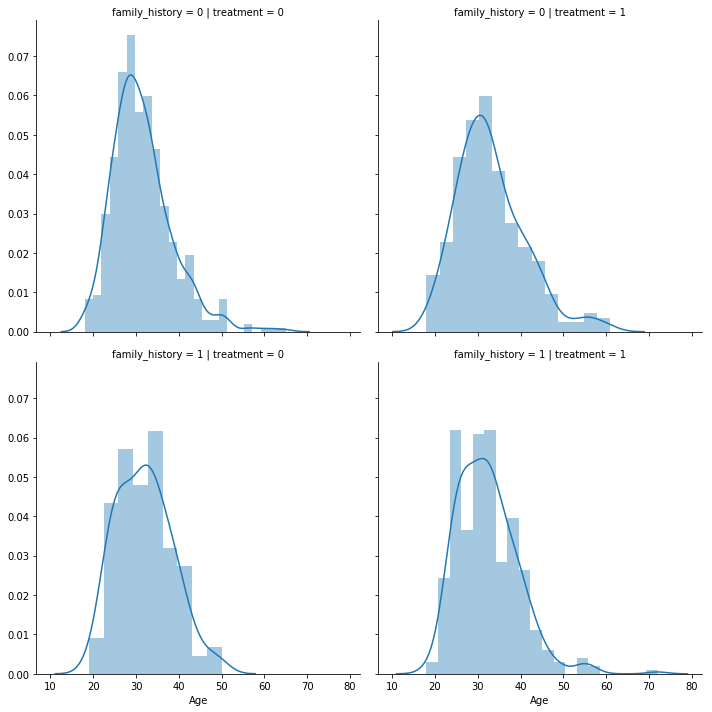

In [86]:
# Separate by treatment or not and by gender
f = sns.FacetGrid(df, col='treatment', row='family_history', size=5)
f = f.map(sns.distplot, "Age")

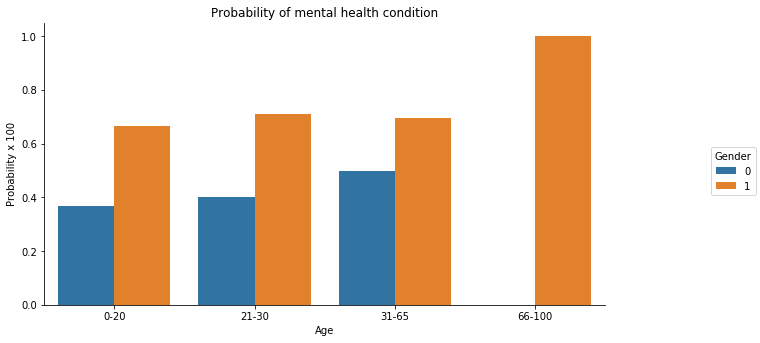

In [87]:
g = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

g.set_xticklabels(['0-20', '21-30', '31-65', '66-100'])

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)


plt.show()

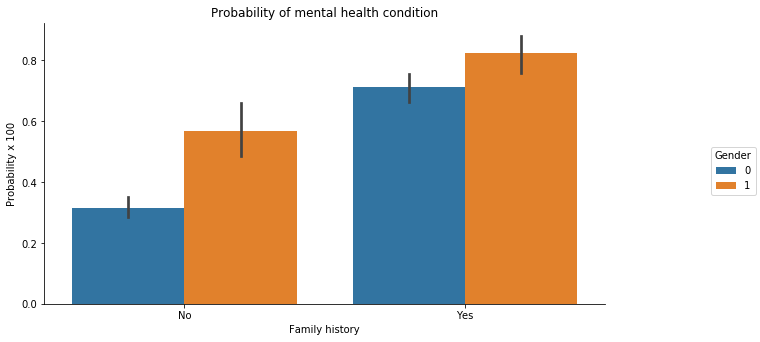

In [88]:
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family history')

g.set_xticklabels(['No', 'Yes'])

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

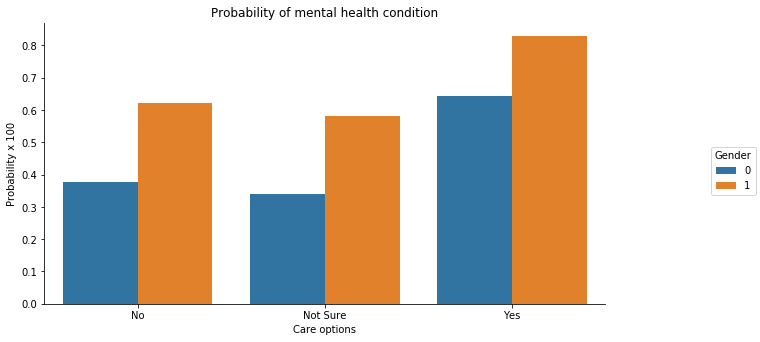

In [89]:
#df.care_options
#not sure = 1
#no = 0
#yes = 2
g = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

g.set_xticklabels(['No', 'Not Sure', 'Yes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

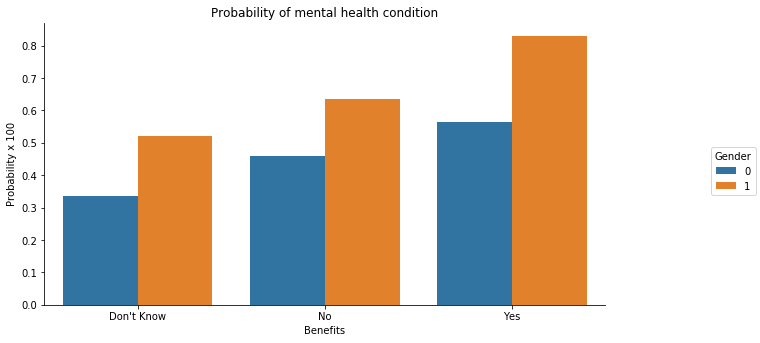

In [90]:
#2 - Yes
#0 - dont know
#1 - no
g = sns.factorplot(x="benefits", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

g.set_xticklabels(['Don\'t Know', 'No', 'Yes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

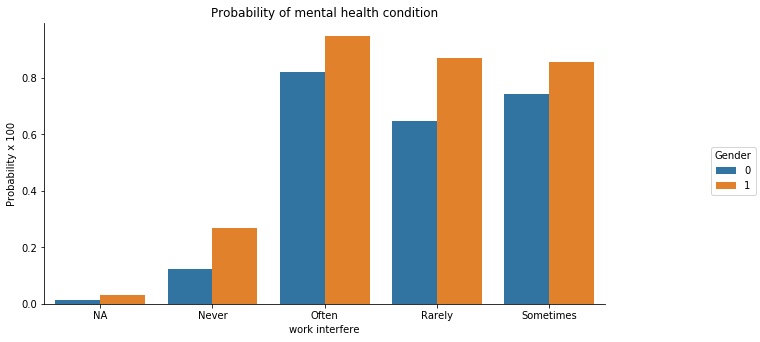

In [91]:
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('work interfere')

g.set_xticklabels(['NA', 'Never', 'Often', 'Rarely', 'Sometimes'])
# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()
#work interference
#0 - NA
#1 - Never
#2 - Often
#3 - Rarely
#4 - Sometimes

In [92]:
#process of testing the hypothesis by performing chi square on 
freq_family_hist = np.sort(df.family_history)
counts_fam = collections.Counter(freq_family_hist)
counts_fam

Counter({0: 767, 1: 492})

In [93]:
freq_treatment = np.sort(df.treatment)
counts_treatment = collections.Counter(freq_treatment)
counts_treatment

Counter({0: 622, 1: 637})

In [94]:
table = [[767, 492], [622,637]]

In [95]:
stat, p, dof, expected = stats.chi2_contingency(table, correction=False)

In [96]:
stat

33.759463990444985

In [97]:
p
#reject null hypothesis that family history and treatment are independent 
#Ha: not independent 

6.236490588678939e-09

In [98]:
dof

1

In [99]:
expected

array([[694.5, 564.5],
       [694.5, 564.5]])

<b> Chi-Squared Test of independence on all features to determine the statistically significant ones </b>

In [100]:
chi_treatment = df['treatment']
chi_df = df.drop(columns='treatment')
type(chi_treatment)

pandas.core.series.Series

In [101]:
for column in df:
    crosstab = pd.crosstab(df[column], df['treatment'])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    if p < .05:
        print('p value for', column, ':', p)

p value for Gender : 1.2926175878204295e-12
p value for Country : 0.01705720173000851
p value for family_history : 1.1584182294491328e-40
p value for treatment : 6.790757177941158e-275
p value for work_interfere : 1.944084172920949e-127
p value for benefits : 8.326816588490713e-15
p value for care_options : 2.6509645800176187e-21
p value for wellness_program : 0.003186522932181415
p value for seek_help : 0.004223416520618908
p value for anonymity : 1.8304549906790162e-06
p value for leave : 5.025795235445741e-06
p value for mental_health_consequence : 1.4180505235573011e-05
p value for coworkers : 0.04975472196415934
p value for mental_health_interview : 0.0017553628170834984
p value for mental_vs_physical : 0.00016181406137210283
p value for obs_consequence : 4.020553287446151e-08


<b> Perfrom a two sample Z test on family history vs treatment and gender vs treatment </b>

In [102]:
from statsmodels.stats.weightstats import ztest
#The family history was divided into the people who had a family history corresponding to treatment values and people who 
#didn't have a family history corresponding to treatment values.
x_ztest = df[df.family_history==1].treatment
y_ztest = df[df.family_history==0].treatment
tstat, p = ztest(x_ztest, y_ztest)
print("P value for family history for a two sample Z test or proportion is :", p)

#The gender was divided into males corresponding to treatment values and females corresponding to treatment values.
male_ztest = df[df.Gender==0].treatment
female_ztest = df[df.Gender==1].treatment
tstat_gender, p_gender = ztest(male_ztest, female_ztest)
print("P value for Gender for a two sample Z test or proportion is :", p_gender)

P value for family history for a two sample Z test or proportion is : 1.820343805112358e-47
P value for Gender for a two sample Z test or proportion is : 2.6794412434712703e-13


<b>Starting the Modeling process</b>

In [103]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [104]:
# Create arrays for the features and the response variable
y = df['treatment'].values
X = df.drop(['treatment', 'Age'], axis=1).values
X_df = df.drop(['treatment', 'Age'], axis=1).columns
#X = df.drop('Age', axis=1).values
X_df

Index(['Gender', 'Country', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

In [105]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

Best C: 1
Best penalty: l1
prediction: [1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 1 1 1 0 0 1 0]
accuracy store: 0.8306878306878307
Confusion Matrix [[160  38]
 [ 26 154]]
Classification Report              precision    recall  f1-score   support

          0       0.86      0.81      0.83

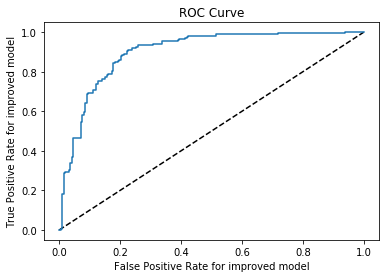

In [106]:
# Create the classifier: logreg
#the grid of parameters to search over
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
Cs = [0.001, .01, 0.1, 1, 10, 30, 60, 90, 100, 300, 600, 1000]
#Cs = [0.001, .003, .006, .01, .03, .06, 0.1, .3, .6, 1, 3, 6, 10, 100]
penalty = ['l1', 'l2']
parameters = [{'C':Cs, 'penalty': penalty}]
logreg = LogisticRegression()
clf_lr = GridSearchCV(logreg, parameters, cv=5)
best_model = clf_lr.fit(X_train, y_train)
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
ytest_pred = best_model.predict(X_test)
print('prediction:', ytest_pred)
print('accuracy store:', accuracy_score(y_test, ytest_pred))
print("Confusion Matrix", confusion_matrix(y_test, ytest_pred))
print("Classification Report", classification_report(y_test, ytest_pred))
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('False Positive Rate for improved model')
plt.ylabel('True Positive Rate for improved model')
plt.title('ROC Curve')
plt.show()


In [107]:
# Fit the classifier to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [161]:
# Compute and print the confusion matrix and classification report
print('accuracy store:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy store: 0.8333333333333334
[[159  39]
 [ 24 156]]
             precision    recall  f1-score   support

          0       0.87      0.80      0.83       198
          1       0.80      0.87      0.83       180

avg / total       0.84      0.83      0.83       378



<b>Plotting the ROC curve</b>

In [110]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [111]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [112]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

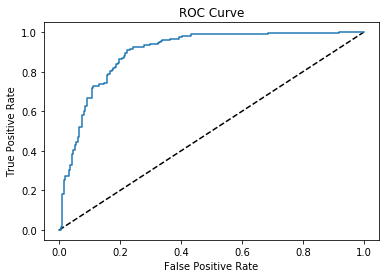

In [113]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<b>Starting a Random Forest Classifier</b>

In [114]:
from sklearn.ensemble import RandomForestClassifier

Best params: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 800, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Confusion Matrix [[160  38]
 [ 20 160]]
Classification Report              precision    recall  f1-score   support

          0       0.89      0.81      0.85       198
          1       0.81      0.89      0.85       180

avg / total       0.85      0.85      0.85       378



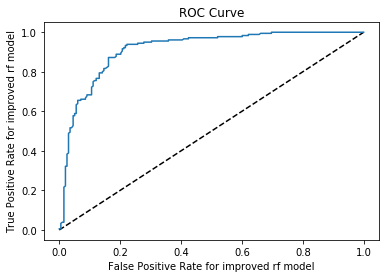

In [128]:
rf_tuned = RandomForestClassifier()
param_grid = [
    {'n_estimators' : list(range(100,1000,50))}
]
clf_rf = GridSearchCV(rf_tuned, param_grid, cv=6)
best_model_rf = clf_rf.fit(X_train, y_train)
print('Best params:', best_model_rf.best_estimator_.get_params())
ytest_pred_rf = best_model_rf.predict(X_test)
accuracy_score(y_test, ytest_pred_rf)
print("Confusion Matrix", confusion_matrix(y_test, ytest_pred_rf))
print("Classification Report", classification_report(y_test, ytest_pred_rf))
# Compute predicted probabilities: y_pred_prob
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
#print("feature importances:", best_model_rf.feature_importances_)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate for improved rf model')
plt.ylabel('True Positive Rate for improved rf model')
plt.title('ROC Curve')
plt.show()

In [162]:
accuracy_score(y_test, ytest_pred_rf)

0.8465608465608465

In [139]:
clf_rf_fi = RandomForestClassifier(n_estimators=600)
clf_rf_fi.fit(X_train, y_train)
clf_rf_fi.predict(X_test)
print(clf_rf_fi.feature_importances_)
X_df

[0.03091098 0.05334571 0.01114345 0.07106168 0.33830053 0.0486359
 0.01731983 0.01498566 0.03424844 0.04234905 0.0226806  0.02598666
 0.02148192 0.04313233 0.0290859  0.01926931 0.03085815 0.03020258
 0.0153802  0.02962657 0.02795835 0.01576026 0.02627593]


Index(['Gender', 'Country', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_range'],
      dtype='object')

Feature ranking:
1. feature work_interfere (0.338301)
2. feature family_history (0.071062)
3. feature Country (0.053346)
4. feature no_employees (0.048636)
5. feature leave (0.043132)
6. feature care_options (0.042349)
7. feature benefits (0.034248)
8. feature Gender (0.030911)
9. feature coworkers (0.030858)
10. feature supervisor (0.030203)
11. feature phys_health_interview (0.029627)
12. feature mental_health_consequence (0.029086)
13. feature mental_vs_physical (0.027958)
14. feature age_range (0.026276)
15. feature seek_help (0.025987)
16. feature wellness_program (0.022681)
17. feature anonymity (0.021482)
18. feature phys_health_consequence (0.019269)
19. feature remote_work (0.017320)
20. feature obs_consequence (0.015760)
21. feature mental_health_interview (0.015380)
22. feature tech_company (0.014986)
23. feature self_employed (0.011143)


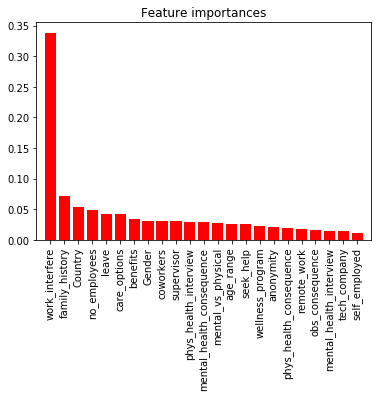

In [154]:
indices = np.argsort(clf_rf_fi.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_df[indices[f]], clf_rf_fi.feature_importances_[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), clf_rf_fi.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X_df[indices], rotation='90')
plt.xlim([-1, X.shape[1]])
plt.show()

In [129]:
rf = RandomForestClassifier(n_estimators=800)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
rf_predictions = rf.predict(X_test)

In [164]:
print(accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

0.843915343915344
[[158  40]
 [ 19 161]]
             precision    recall  f1-score   support

          0       0.89      0.80      0.84       198
          1       0.80      0.89      0.85       180

avg / total       0.85      0.84      0.84       378



In [132]:
# Compute predicted probabilities: rf_pred_prob
rf_pred_prob = logreg.predict_proba(X_test)[:,1]

In [133]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred_prob)

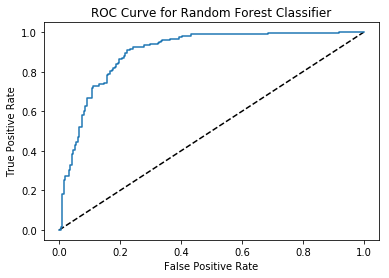

In [134]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

<b>Starting SVM Classifier </b>

In [135]:
from sklearn import svm

In [136]:
#initialize the model
svm_model = svm.SVC(kernel='linear')

In [137]:
#fit the model
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
'''
#Visualize the results
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy = a * xx - (svm_model.intercept_[0] / w[1])

#Plot the parallels to the separating hyperplane that pass through the Support Vectors
b = svm_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])'''

In [ ]:
svm_prediction = svm_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))

In [ ]:
# Compute predicted probabilities: y_pred_prob
svm_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_prediction)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.show()